In [3]:
from google.colab import files
uploaded = files.upload()

Saving 2. Diagnose Diabetes.csv to 2. Diagnose Diabetes.csv


<ipython-input-5-4b8bd8b5b091>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


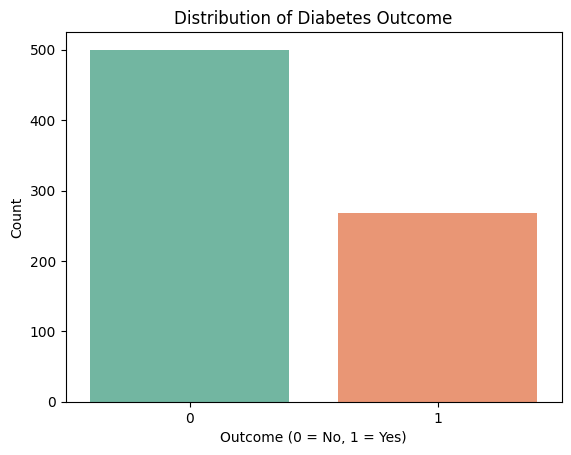

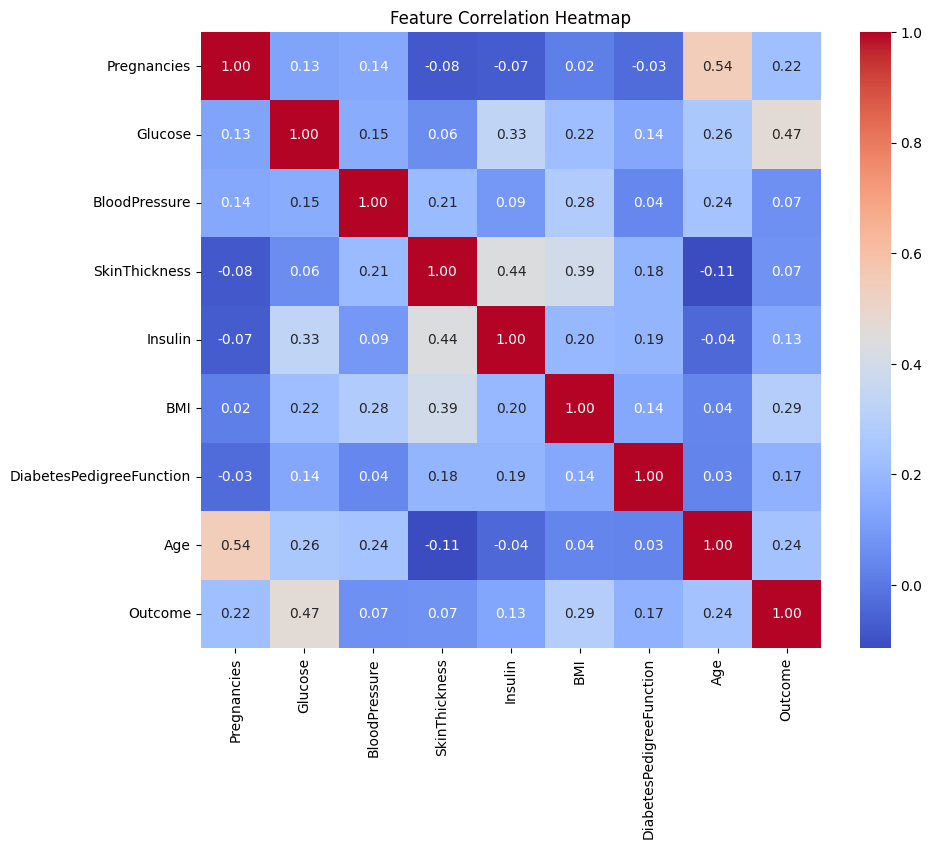

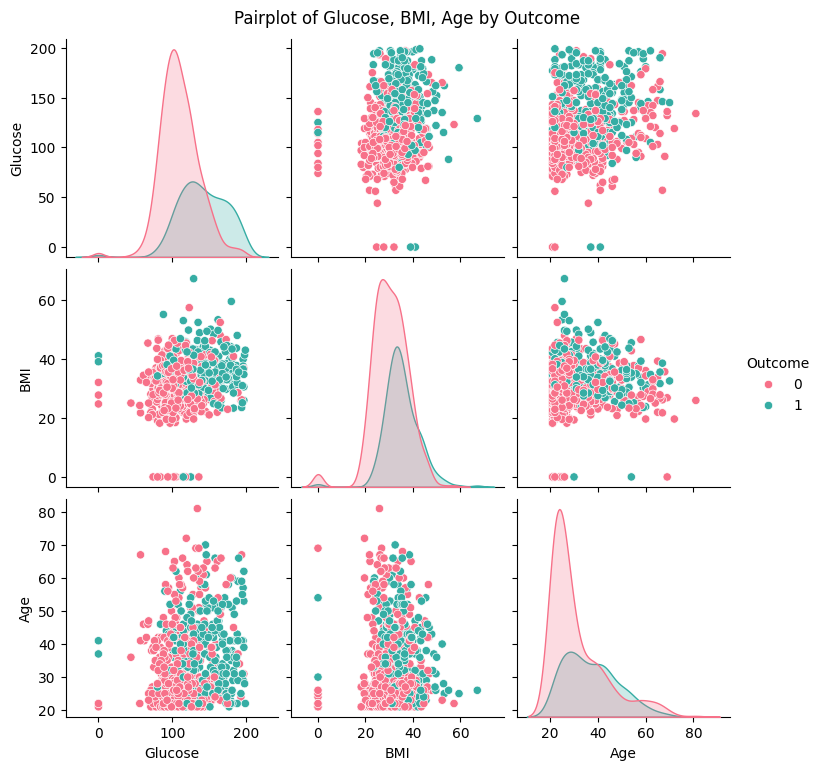

Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("2. Diagnose Diabetes.csv")

# ------------------ Data Visualization ------------------

# Bar plot of Outcome distribution
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Heatmap of correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Clean data for pairplot (ensure numeric types)
cols = ['Glucose', 'BMI', 'Age', 'Outcome']
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df_clean = df[cols].dropna()

# Pairplot of selected features by Outcome
sns.pairplot(df_clean, hue='Outcome', palette='husl')
plt.suptitle('Pairplot of Glucose, BMI, Age by Outcome', y=1.02)
plt.show()

# ------------------ Machine Learning Model ------------------

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Handle non-numeric issues
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any rows with missing values
X.dropna(inplace=True)
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
